In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df= pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [55]:
df['TotalCharges'].isna().sum()

0

In [56]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [57]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

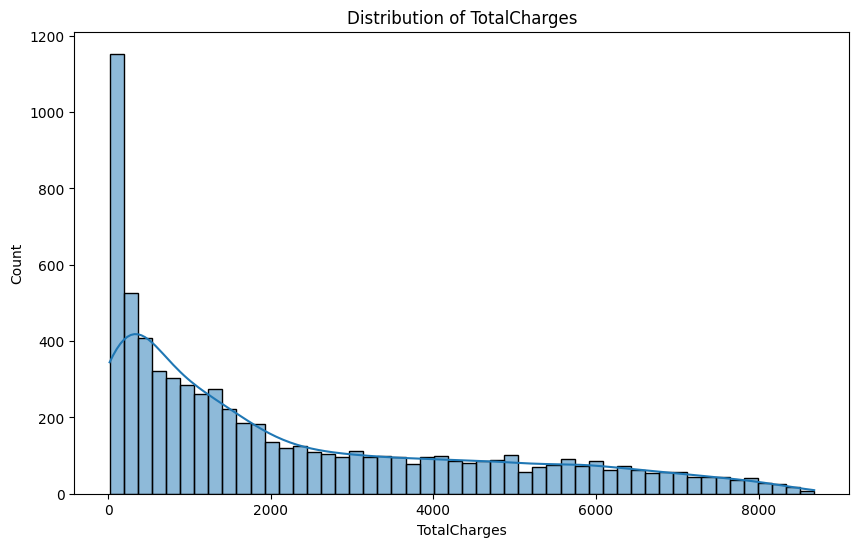

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'].astype(float), bins=50, kde=True)
plt.title('Distribution of TotalCharges')
plt.show()

In [59]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [60]:
df['TotalCharges'].isnull().sum()

0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.drop('customerID', axis=1, inplace=True)

In [63]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# One-Hot Encoding for multi-category columns

## columns - InternetService , Contract , PaymentMethod , MultipleLines , 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'


#  Label Encoding for binary columns

## columns - gender , partner , dependents , PhoneService

In [64]:

df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines'], drop_first=True)
df = pd.get_dummies(df, columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)


df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   object 
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   object 
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [66]:
df['InternetService_Fiber optic']

0       False
1       False
2       False
3       False
4        True
        ...  
7038    False
7039     True
7040    False
7041     True
7042     True
Name: InternetService_Fiber optic, Length: 7043, dtype: bool

In [67]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,1,0,Yes,29.85,29.85,No,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,34,1,No,56.95,1889.50,No,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,2,1,Yes,53.85,108.15,Yes,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,45,0,No,42.30,1840.75,No,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,Yes,70.70,151.65,Yes,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,84.80,1990.50,No,...,0,0,0,1,0,1,0,1,0,1
7039,1,0,1,1,72,1,Yes,103.20,7362.90,No,...,0,1,0,1,0,0,0,1,0,1
7040,1,0,1,1,11,0,Yes,29.60,346.45,No,...,0,0,0,0,0,0,0,0,0,0
7041,0,1,1,0,4,1,Yes,74.40,306.60,Yes,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

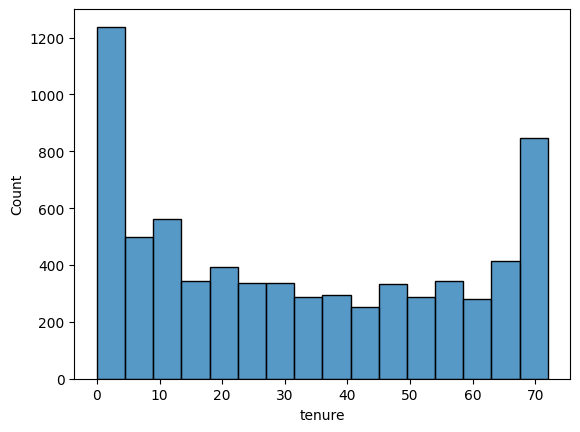

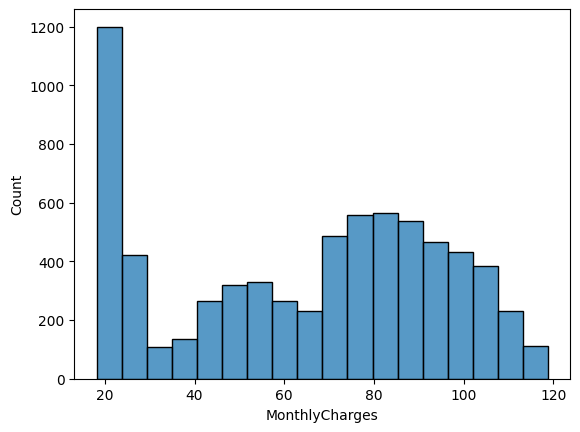

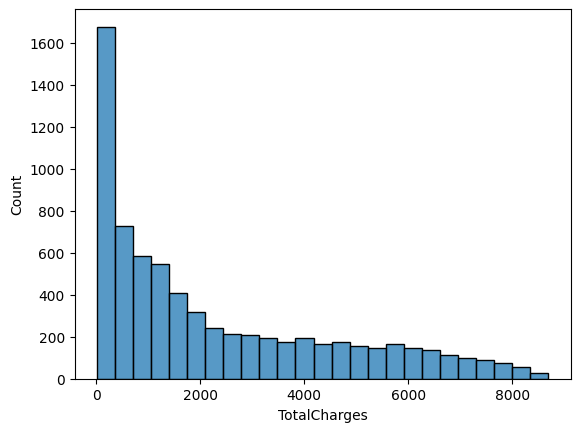

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['tenure'])
plt.show()

sns.histplot(df['MonthlyCharges'])
plt.show()

sns.histplot(df['TotalCharges'])
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['tenure'] = scaler.fit_transform(df[['tenure']])
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = scaler.fit_transform(df[['TotalCharges']])

In [71]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,-0.340876,1,1,0.665992,-0.128655,0,...,0,0,0,1,0,1,0,1,0,1
7039,1,0,1,1,1.613701,1,1,1.277533,2.243151,0,...,0,1,0,1,0,0,0,1,0,1
7040,1,0,1,1,-0.870241,0,1,-1.168632,-0.854469,0,...,0,0,0,0,0,0,0,0,0,0
7041,0,1,1,0,-1.155283,1,1,0.320338,-0.872062,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
X_train , y_train

(      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
 2142       1              0        0           1 -0.463037             1   
 1623       1              0        0           0  0.880735             1   
 6074       0              0        1           0 -1.277445             0   
 1362       0              0        0           0 -1.155283             1   
 6754       0              0        0           1 -1.318165             1   
 ...      ...            ...      ...         ...       ...           ...   
 3772       0              0        1           0 -1.277445             1   
 5191       1              0        1           1 -0.381597             1   
 5226       0              0        1           1 -0.829521             1   
 5390       0              1        0           0 -0.829521             1   
 860        0              0        0           0 -0.259435             1   
 
       PaperlessBilling  MonthlyCharges  TotalCharges  \
 2142            

In [74]:
# Check for missing values
print(X_train.isnull().sum())


gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProte

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


log_reg = LogisticRegression()
rf = RandomForestClassifier()

Accuracy: 0.8219


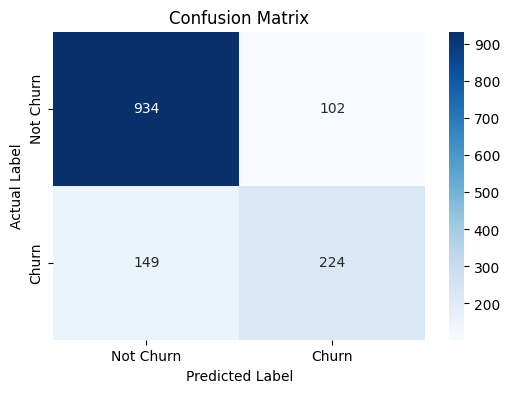

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC-AUC Score: 0.8621


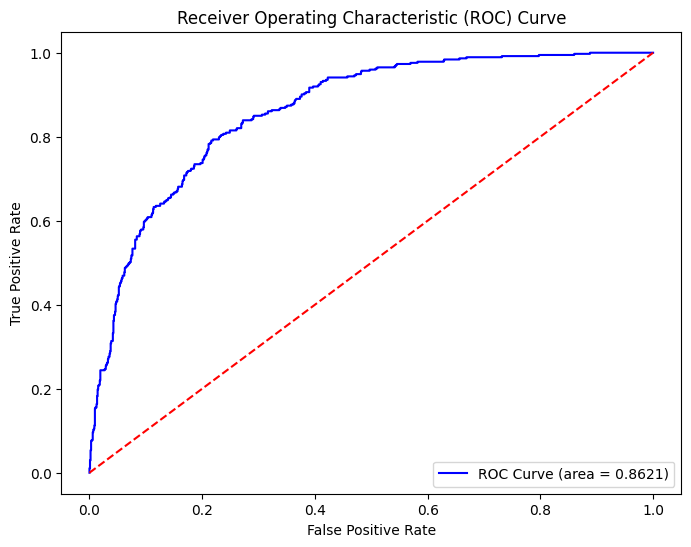

In [76]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


print('Classification Report:')
print(classification_report(y_test, y_pred_log))


roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Random Forest Accuracy: 0.7956


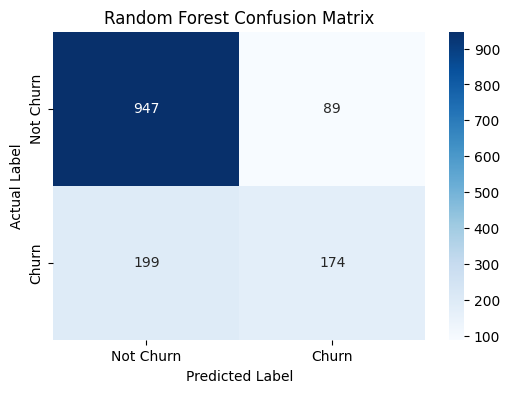

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Random Forest ROC-AUC Score: 0.8395


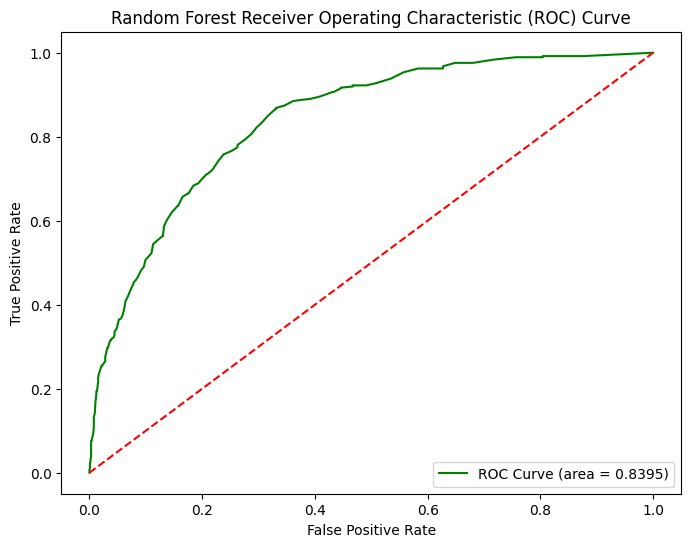

In [77]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))


roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
print(f'Random Forest ROC-AUC Score: {roc_auc_rf:.4f}')


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve (area = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.8091


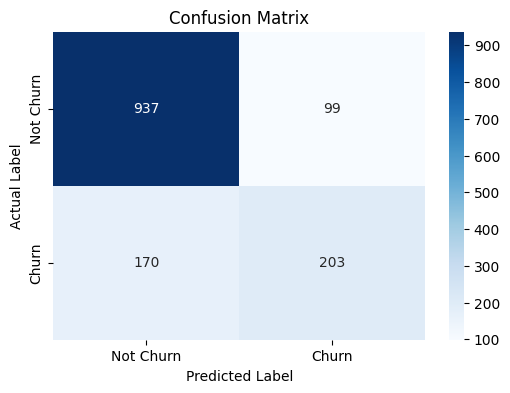

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC Score: 0.8622


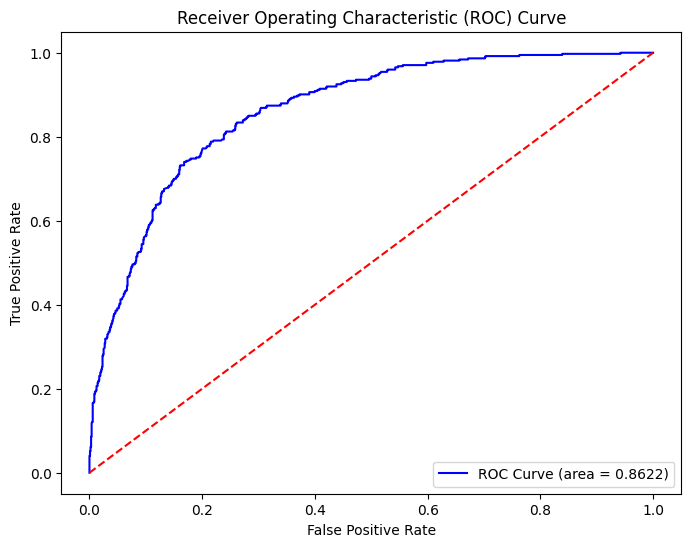

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


gb = GradientBoostingClassifier()


gb.fit(X_train, y_train)


y_pred_gb = gb.predict(X_test)


y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


print('Classification Report:')
print(classification_report(y_test, y_pred_gb))


roc_auc = roc_auc_score(y_test, y_pred_prob_gb)
print(f'ROC-AUC Score: {roc_auc:.4f}')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.7984


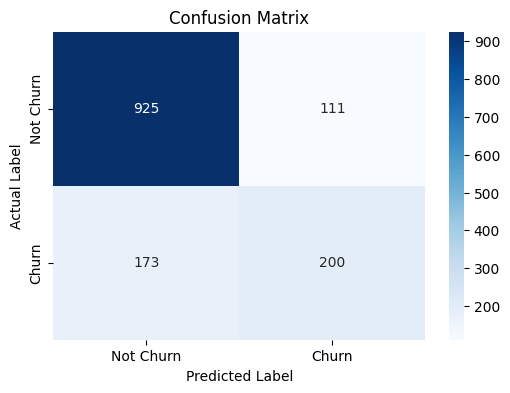

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC Score: 0.8391


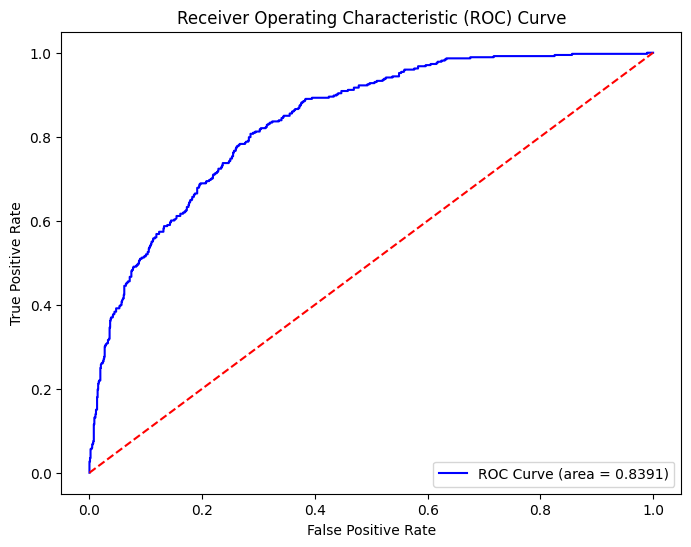

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')


xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


print('Classification Report:')
print(classification_report(y_test, y_pred_xgb))


roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)
print(f'ROC-AUC Score: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Voting Classifier Accuracy: 0.8070


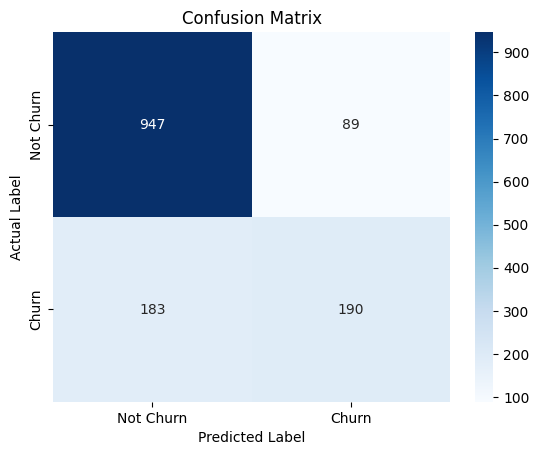

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC Score: 0.8581


In [80]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')


voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('xgb', xgb_model)], voting='soft')


voting_clf.fit(X_train, y_train)


y_pred_voting = voting_clf.predict(X_test)
y_pred_prob_voting = voting_clf.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


print('Classification Report:')
print(classification_report(y_test, y_pred_voting))


roc_auc = roc_auc_score(y_test, y_pred_prob_voting)
print(f'ROC-AUC Score: {roc_auc:.4f}')


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Accuracy: 0.8204


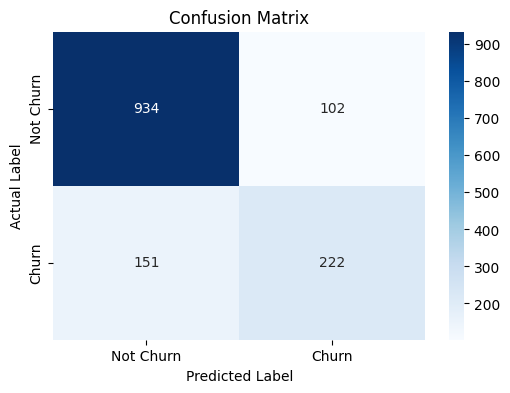

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

ROC-AUC Score: 0.8618


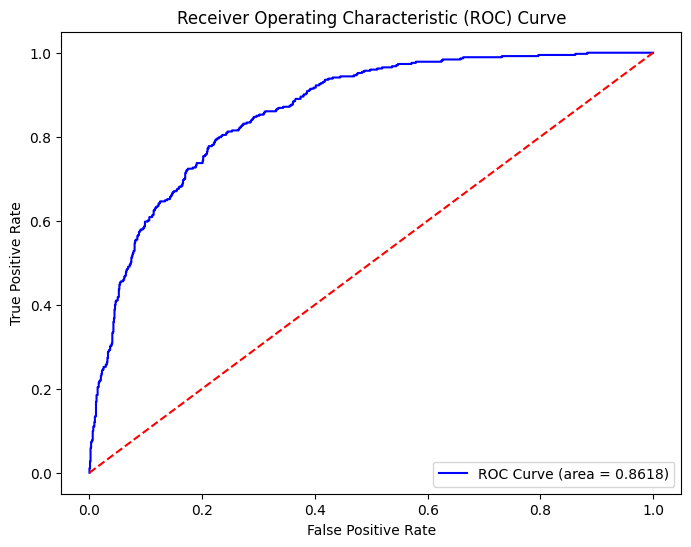

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
}


log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

best_log_reg = grid_search.best_estimator_

y_pred_log = best_log_reg.predict(X_test)
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy:.4f}')


conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


print('Classification Report:')
print(classification_report(y_test, y_pred_log))


roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
